In [1]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import metrics as sk_metrics

from pyspotstream.datasets import fetch_opm
from pyspotstream.eval import evaluation as ev
from pyspotstream.misc.drift_generator import generate_drift

# 1 Load OPM

In [2]:
ds = fetch_opm(include_categorical=False, include_numeric=True)
X = ds.data[["List Year","Assessed Value","Sale Amount","Sales Ratio"]]
y = ds.target

# 2 Generate Drift

In [3]:
X_d = copy.deepcopy(X)
y_d = copy.deepcopy(y)

drift = [1.1,10.0,0.1,1.0]

mr = generate_drift(X_d, drift) 
y_d = np.array(y_d).reshape(-1,)
X_d["Assessed Value"] = X_d["Assessed Value"] * mr
y_d = y_d * mr

## Plot the Data with drift:

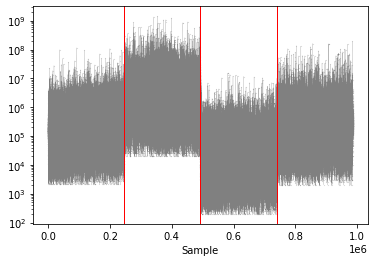

In [4]:
x_1 = range(X_d.shape[0])
plt.plot(x_1, y_d, color='grey', marker='o', linestyle='dashed', linewidth=.2, markersize=.1,)
plt.yscale('log')
plt.xlabel("Sample")
for i in range(1,4):
    plt.axvline(x=i*np.divmod(X_d.shape[0], 4)[0], color='r', linestyle='-', linewidth = 1)

# 3 Selection of the metric

In [5]:
metric = sk_metrics.mean_absolute_error

# 4 Experimente Batch ML

In [6]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, 
                                                    y, 
                                                    test_size=0.9, 
                                                    random_state=0, 
                                                    shuffle=False)

## 4.1 Batch Decision Tree Regressor

In [7]:
from sklearn.tree import DecisionTreeRegressor

dtr_res = ev.run_batch_ml(train_X, 
                          test_X, 
                          train_y, 
                          test_y,
                          model = DecisionTreeRegressor(random_state=0),
                          metric=metric)

In [8]:
print(dtr_res.name)
print(dtr_res.score)
print(dtr_res.time)
print(dtr_res.mem)
print(dtr_res.model)

DecisionTreeRegressor
{0: 5838.331926627114}
{0: 0.28575962499999985}
{0: 4650.83203125}
{0: DecisionTreeRegressor(random_state=0)}


## 4.2 Batch Random Forest

In [9]:
from sklearn.ensemble import RandomForestRegressor

rfr_res = ev.run_batch_ml(train_X, 
                          test_X, 
                          train_y, 
                          test_y,
                          model = RandomForestRegressor(n_estimators=100, random_state=0),
                          metric=metric)

In [10]:
print(rfr_res.name)
print(rfr_res.score)
print(rfr_res.time)
print(rfr_res.mem)
print(rfr_res.model)

RandomForestRegressor
{0: 4124.122371020969}
{0: 17.317412917}
{0: 5911.7587890625}
{0: RandomForestRegressor(random_state=0)}


# Mini Batch Learning

## Sklearn

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import pipeline as sk_pipeline
from sklearn import preprocessing as sk_preprocessing
from sklearn import metrics as sk_metrics

x_seq_lin = np.linspace(1, train_X.shape[0], 100, dtype=int, endpoint=False)[1:]

model = sk_pipeline.make_pipeline(sk_preprocessing.StandardScaler(),DecisionTreeRegressor(random_state=0))

dtr_mini_res = ev.run_mini_batch_sklearn(X_d, 
                                         pd.Series(y_d), 
                                         x_seq_lin,
                                         model, 
                                         metric,
                                         eval_on_full_data=False,
                                         fit_on_available_data=False,
                                         fit_on_fixed=False,
                                         fixed_train_size=0,
                                         n_fit=10)

0. Breaking Point: 986
	Fit on 0:986.
	Predict on 986:1972.
1. Breaking Point: 1972
	Fit on 0:1972.
	Predict on 1972:2958.
2. Breaking Point: 2958
	Fit on 0:2958.
	Predict on 2958:3944.
3. Breaking Point: 3944
	Fit on 0:3944.
	Predict on 3944:4930.
4. Breaking Point: 4930
	Fit on 0:4930.
	Predict on 4930:5916.
5. Breaking Point: 5916
	Fit on 0:5916.
	Predict on 5916:6901.
6. Breaking Point: 6901
	Fit on 0:6901.
	Predict on 6901:7887.
7. Breaking Point: 7887
	Fit on 0:7887.
	Predict on 7887:8873.
8. Breaking Point: 8873
	Fit on 0:8873.
	Predict on 8873:9859.
9. Breaking Point: 9859
	Fit on 0:9859.
	Predict on 9859:10845.
10. Breaking Point: 10845
	Fit on 986:10845.
	Predict on 10845:11831.
11. Breaking Point: 11831
	Fit on 1972:11831.
	Predict on 11831:12817.
12. Breaking Point: 12817
	Fit on 2958:12817.
	Predict on 12817:13802.
13. Breaking Point: 13802
	Fit on 3944:13802.
	Predict on 13802:14788.
14. Breaking Point: 14788
	Fit on 4930:14788.
	Predict on 14788:15774.
15. Breaking Point

In [12]:
print(dtr_mini_res.name)
print(dtr_mini_res.score[x_seq_lin[0]])
print(dtr_mini_res.time[x_seq_lin[0]])
print(dtr_mini_res.mem[x_seq_lin[0]])
print(dtr_mini_res.model[x_seq_lin[0]])

Pipeline
3292.9359026369175
0.008307625000000485
1793.0771484375
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=0))])


## River

In [13]:
from river import linear_model as river_linear_model

model = river_linear_model.LinearRegression(intercept_lr=.1)

river_mini_res = ev.run_mini_batch_river(X_d, 
                                         pd.Series(y_d), 
                                         x_seq_lin,
                                         model, 
                                         metric,
                                         eval_on_full_data=False,
                                         fit_on_available_data=False,
                                         fit_on_fixed=False,
                                         fixed_train_size=0,
                                         n_fit=10)

0. Breaking Point: 986
	Fit on 0:986.
	Predict on 986:1972.
1. Breaking Point: 1972
	Fit on 0:1972.
	Predict on 1972:2958.
2. Breaking Point: 2958
	Fit on 0:2958.
	Predict on 2958:3944.
3. Breaking Point: 3944
	Fit on 0:3944.
	Predict on 3944:4930.
4. Breaking Point: 4930
	Fit on 0:4930.
	Predict on 4930:5916.
5. Breaking Point: 5916
	Fit on 0:5916.
	Predict on 5916:6901.
6. Breaking Point: 6901
	Fit on 0:6901.
	Predict on 6901:7887.
7. Breaking Point: 7887
	Fit on 0:7887.
	Predict on 7887:8873.
8. Breaking Point: 8873
	Fit on 0:8873.
	Predict on 8873:9859.
9. Breaking Point: 9859
	Fit on 0:9859.
	Predict on 9859:10845.
10. Breaking Point: 10845
	Fit on 986:10845.
	Predict on 10845:11831.
11. Breaking Point: 11831
	Fit on 1972:11831.
	Predict on 11831:12817.
12. Breaking Point: 12817
	Fit on 2958:12817.
	Predict on 12817:13802.
13. Breaking Point: 13802
	Fit on 3944:13802.
	Predict on 13802:14788.
14. Breaking Point: 14788
	Fit on 4930:14788.
	Predict on 14788:15774.
15. Breaking Point

In [14]:
print(river_mini_res.name)
print(river_mini_res.score[x_seq_lin[0]])
print(river_mini_res.time[x_seq_lin[0]])
print(river_mini_res.mem[x_seq_lin[0]])
print(river_mini_res.model[x_seq_lin[0]])

LinearRegression
672271475867957.2
0.0022546249999990664
2762.38671875
LinearRegression


# Online Machine Learning

In [ ]:
from river import linear_model as river_linear_model

res = ev.run_online_ml(X_d, 
                    pd.Series(y_d),
                    model = river_linear_model.LinearRegression(intercept_lr=.1),
                    metric=metric)

In [ ]:
print(res.name)
print(res.score)
print(res.time)
print(res.mem)
print(res.model)